In [1]:
from pathlib import Path
import os
import shutil
from datetime import date, timedelta
import xarray as xr
import netCDF4 as nc
import numpy as np

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
TERRAIN_PATH = "/scratch/RTMA/alex.schein/Terrain_Maps"

In [3]:
LON_OFFSET_1 = 0
LON_OFFSET_2 = 1

IDX_MIN_LON = 595 #NOTE: different from URMA grid! 
IDX_MIN_LAT = 645 

IMG_SIZE_LON = 180
IMG_SIZE_LAT = 180

RADIUS = 6371950

In [4]:
xr_terrain_hrrr_3km = xr.open_dataarray(TERRAIN_PATH+"/"+"HRRR_HGT_3km.grib2", engine='cfgrib', decode_timedelta=True)
xr_terrain_hrrr_2p5km = xr.open_dataarray(TERRAIN_PATH+"/"+"test_hrrr_hgt_2p5km.grib2", engine='cfgrib', decode_timedelta=True)
xr_terrain_urma = xr.open_dataarray(TERRAIN_PATH+"/"+"nam_smarttopoconus2p5.grb2", engine='cfgrib', decode_timedelta=True)
xr_terrain_urma_restr = xr.open_dataarray(TERRAIN_PATH+"/"+"terrain_subset_namsmarttopconus2p5.nc", decode_timedelta=True)

In [5]:
xr_terrain_hrrr_2p5km_restr_1 = xr_terrain_hrrr_2p5km.isel(y=slice(IDX_MIN_LAT, IDX_MIN_LAT+IMG_SIZE_LAT),
                                                           x=slice(IDX_MIN_LON+LON_OFFSET_1, IDX_MIN_LON+LON_OFFSET_1+IMG_SIZE_LON))

xr_terrain_hrrr_2p5km_restr_2 = xr_terrain_hrrr_2p5km.isel(y=slice(IDX_MIN_LAT, IDX_MIN_LAT+IMG_SIZE_LAT),
                                                           x=slice(IDX_MIN_LON+LON_OFFSET_2, IDX_MIN_LON+LON_OFFSET_2+IMG_SIZE_LON))

# xr_terrain_hrrr_2p5km_restr

Text(0.5, 1.0, 'Terrain Difference, Downscaled minus Native, LON_OFFSET=0')

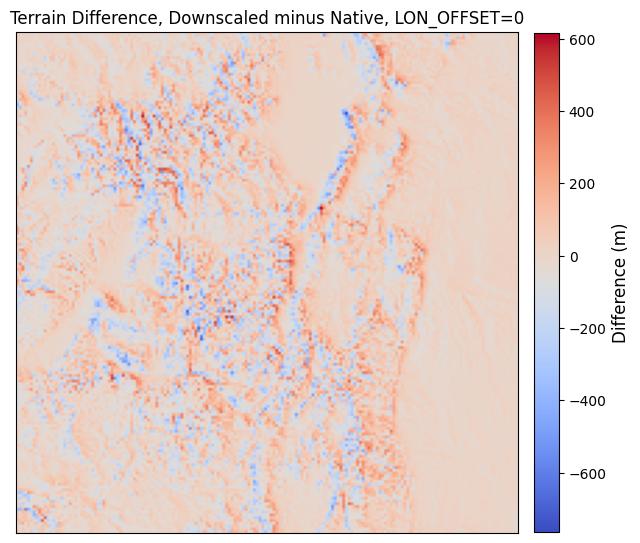

In [6]:
plt.figure(figsize=(7,7))
im=plt.imshow(xr_terrain_hrrr_2p5km_restr_1-xr_terrain_urma_restr, cmap="coolwarm")
plt.xticks([])
plt.yticks([])
# plt.axes("off")
cbar=plt.colorbar(im, fraction=0.046, pad=0.03)
cbar.set_label("Difference (m)", fontsize=12)
plt.title(f"Terrain Difference, Downscaled minus Native, LON_OFFSET={LON_OFFSET_1}")

Text(0.5, 1.0, 'Terrain Difference, Downscaled minus Native, LON_OFFSET=1, R=6371950')

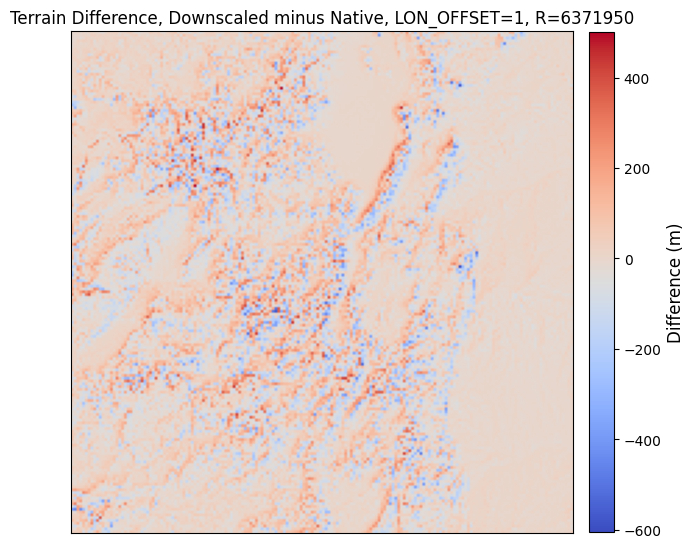

In [7]:
plt.figure(figsize=(7,7))
im=plt.imshow(xr_terrain_hrrr_2p5km_restr_2-xr_terrain_urma_restr, cmap="coolwarm")
plt.xticks([])
plt.yticks([])
# plt.axes("off")
cbar=plt.colorbar(im, fraction=0.046, pad=0.03)
cbar.set_label("Difference (m)", fontsize=12)
plt.title(f"Terrain Difference, Downscaled minus Native, LON_OFFSET={LON_OFFSET_2}, R={RADIUS}")

In [10]:
## LAST RUN: 6/18
xr_terrain_hrrr_2p5km_restr_2.to_netcdf("terrain_subset_HRRR_2p5km.nc")